In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
from scipy.interpolate import make_interp_spline, BSpline
import os

In [87]:
THREADS = 40
ITERATIONS = 50
DIRECTORY = "final_multithread_copy"

In [88]:
def get_res_bad(DIRECTORY, HORIZON, DELTA, SH_IT, FULL_HORIZON=210):
    start_points = []
    points_for_thread = [0] * THREADS
    for i in range(THREADS):
        # try:
        thread_points = np.load(f"{DIRECTORY}/t{i}/start_points_{FULL_HORIZON}.npy", allow_pickle=True)
        start_points += list(thread_points)
        points_for_thread[i] = len(thread_points)
        # except:
        #     pass

    # print(start_points)
    # res = [[0 for i in range(HORIZON)] for j in range(ITERATIONS)]
    # bad = [[0 for i in range(HORIZON)] for j in range(ITERATIONS)]
    res = np.array([0.0] * HORIZON)
    bad = np.array([0.0] * HORIZON)
    res_abs = np.array([0.0] * HORIZON)
    total_points = 0
    for i in range(THREADS):
            # cur_bad = np.load(f"{DIRECTORY}/t{i}/bad_iter={iter}_{HORIZON}.npy", allow_pickle=True)
            # print(f"{DIRECTORY}/t{i}/res_hor={HORIZON}_DELTA={DELTA}_IT={SH_IT}")
        try:
            # self-healing/daemon_self_healing/cluster_daemon_shit=15/t0/res_hor=15_DELTA=15_IT=15.npy
            cur_res = np.load(f"{DIRECTORY}/t{i}/res_hor={HORIZON}_DELTA={DELTA}_IT={SH_IT}.npy", allow_pickle=True)
            cur_bad = np.load(f"{DIRECTORY}/t{i}/bad_hor={HORIZON}_DELTA={DELTA}_IT={SH_IT}.npy", allow_pickle=True)
            cur_res_abs = np.load(f"{DIRECTORY}/t{i}/res_abs_hor={HORIZON}_DELTA={DELTA}_IT={SH_IT}.npy", allow_pickle=True)
            # cur_res = np.load(f"{DIRECTORY}/t{i}/res_iter={iter}_{HORIZON}.npy", allow_pickle=True)
            # print(cur_bad)
            # print(cur_res)
            # print(cur_res)
            # print(len(cur_res)
            res = res + cur_res[:HORIZON]
            bad = bad + cur_bad[:HORIZON]
            # print(cur_res_abs)
            res_abs = res_abs + cur_res_abs[:HORIZON]
            total_points += points_for_thread[i]
        except:
            print(f"There are not enough iterations for thread {i}")
            # break
    print("TOTAL: ",total_points)
    # bad = list(bad)
    # print(bad)
    for i in range(HORIZON):
        if total_points - bad[i]:
            res[i] /= total_points - bad[i]
            res_abs[i] /= total_points - bad[i]
        else:
            res[i] = float('nan')
            res_abs[i] = float('nan')
    bad /= total_points
    # print(res)
    # print(res_abs)
    # print(bad)
    return res, res_abs, bad

In [89]:
num_bad_ideal = np.load(f"../superscript/super_metrics/h_{1000}_n={100}_bad.npy", allow_pickle=True)
for i in range(len(num_bad_ideal)):
    num_bad_ideal[i] = num_bad_ideal[i] * (i + 1) / 100

In [90]:
def draw_bad(bad, hor, plt, label):
    l, = plt.plot([sum(bad[:i]) / (i + 1) for i in range(1, hor + 1)])
    l.set_label(label)
    return l

TOTAL:  100
TOTAL:  100
There are not enough iterations for thread 38
TOTAL:  97
TOTAL:  100


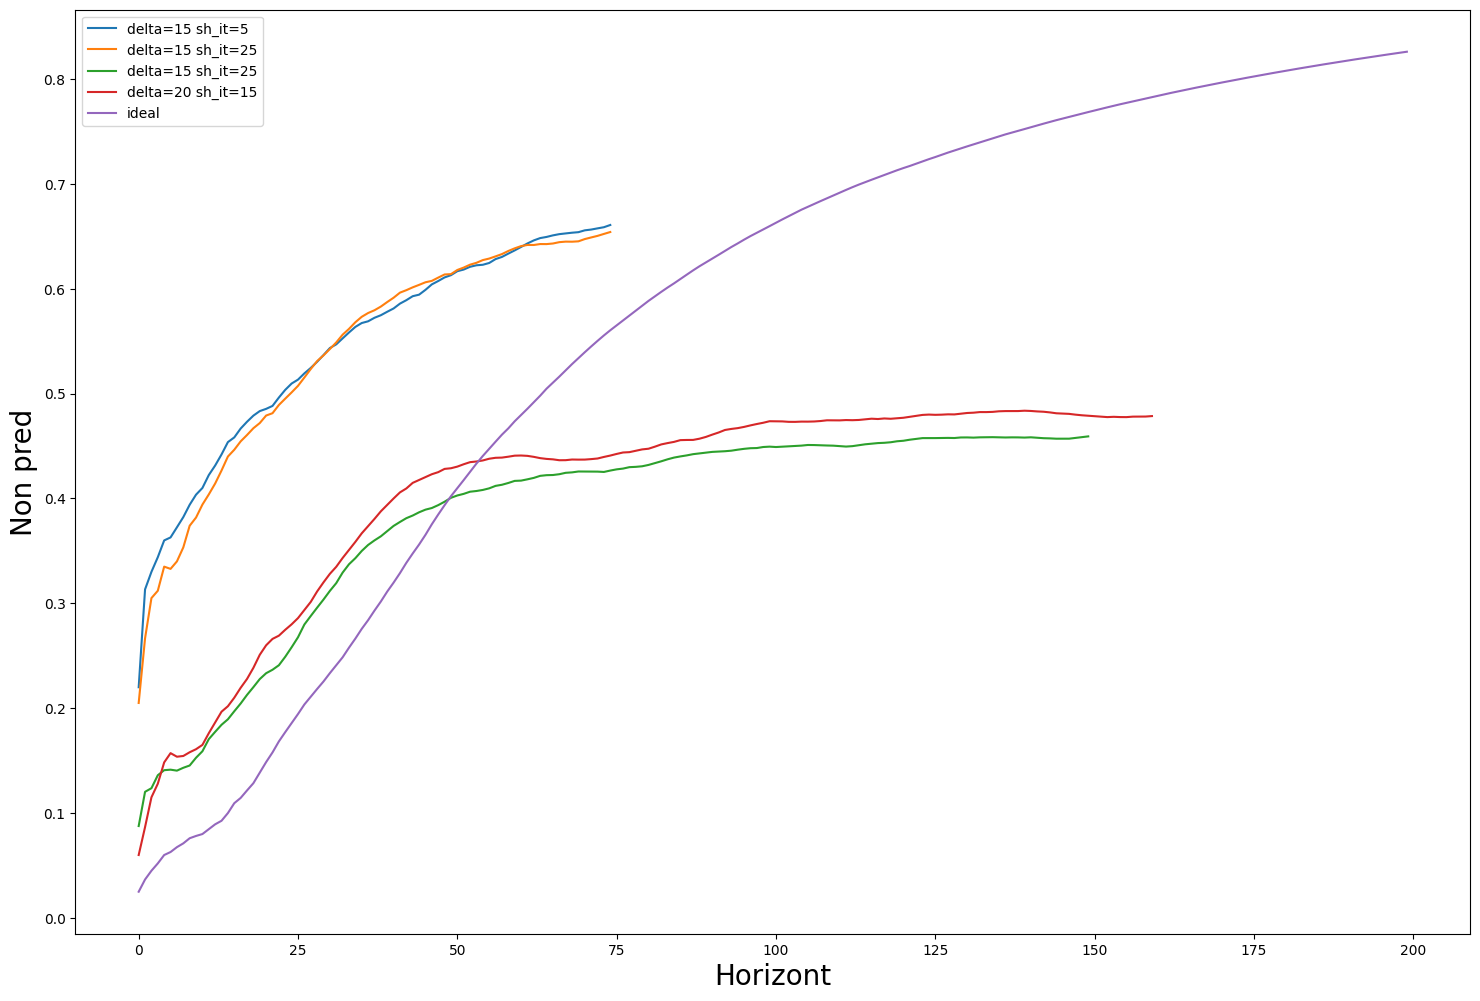

In [91]:
# res, res_abs, bad = get_res_bad("daemon_self_healing/cluster_daemon_shit=15", 60, 15, 15)
res, res_abs, bad = get_res_bad("daemon_self_healing/cluster_daemon_shit=5", 75, 15, 5)
res, res_abs, bad_10 = get_res_bad("daemon_self_healing/cluster_daemon_delta_15_shit=25", 90, 15, 25)
res, res_abs, bad_ideal_25 = get_res_bad("far_prediction_with_sh/delta=15_shit=25", 150, 15, 25)
res, res_abs, bad_ideal_15 = get_res_bad("far_prediction_with_sh/delta=20_shit=15", 160, 20, 15, 240)
# print(res_to_draw)
# print(bad)
# print(res)
plt.figure(figsize=(18, 12))

# plt.plot([sum(bad[:i]) for i in range(1, len(bad) + 1)])
# plt.legend("best_loc")
# l, = plt.plot([sum(bad[:i]) / (i + 1) for i in range(1, 75)][:200])
# l.set_label("Ideal")
draw_bad(bad, 75, plt, "delta=15 sh_it=5")
draw_bad(bad_10, 75, plt, "delta=15 sh_it=25")
draw_bad(bad_ideal_25, 150, plt, "delta=15 sh_it=25")
draw_bad(bad_ideal_15, 160, plt, "delta=20 sh_it=15")
draw_bad(num_bad_ideal, 200, plt, "ideal")
plt.legend()
plt.xlabel("Horizont", size=20)
plt.ylabel("Non pred", size=20)
plt.show()
# daemon_self_healing/cluster_daemon_shit=15/t0/res_hor=45_DELTA=15_IT=15.npy